In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
data = pd.read_csv("../Data_final/demo_and_housing.csv", index_col=0)
data.sort_values(by=['price'], ascending=False, inplace = True)
data = data.select_dtypes(include='number')
data.insert(0, 'price', data.pop('price'))
data

,price,year_built,is_new_construction,beds,baths,baths_beds_ratio,garage,lot_size,building_size,population,...,hhi_200k_or_more,race_and_ethnicity_total,population_density_sq_mi,median_age,educational_attainment_bachelors,educational_attainment_graduate,family_poverty_pct,unemployment_pct,housing_units,median_value_of_owner_occupied_units
zipcode,,,,,,,,,,,,,,,,,,,,,
92078,915000000,2018,0,4,3.5,0.8750,3,30492,2575,95355,...,2682,50510,3028.0,38.8,0.3050,0.1570,0.0540,0.036,18729,572100
92019,865000000,1985,0,4,3.0,0.7500,3,6746,1980,103186,...,1919,43272,1560.0,39.8,0.2141,0.1230,0.0800,0.056,15449,520100
92113,515000000,1940,0,3,2.0,0.6667,2,3437,1336,1409573,...,231,58408,11090.0,26.8,0.0640,0.0220,0.2520,0.099,14476,353900
95110,275000000,2018,0,3,2.0,0.6667,2,113025,0,1027690,...,1082,19928,4268.0,32.4,0.2109,0.1630,0.0960,0.048,6954,631500
94158,202000000,1972,0,3,2.0,0.6667,2,31400,0,874961,...,1602,8455,12160.0,34.4,0.3582,0.3782,0.0660,0.023,5114,1061700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92530,3000,1972,0,3,2.0,0.6667,2,2178,3550,65817,...,463,58184,1080.0,31.0,0.0970,0.0350,0.1321,0.094,16431,324100
95973,909,1972,0,3,2.0,0.6667,2,131987,0,94529,...,1214,36682,110.2,36.4,0.2471,0.1290,0.0630,0.038,15236,353000
92562,174,1972,0,3,2.0,0.6667,2,206474,3550,112941,...,2359,64286,587.5,37.3,0.2050,0.1040,0.0530,0.076,20922,434700


In [3]:
data = data.groupby('zipcode')
count = 0
df = pd.DataFrame()
for name, group in data:
    print("Before: " + str(len(group)))
    truncate_num = int(len(group)*0.05)
    truncate_len = len(group) - truncate_num
    group.sort_values(by=['price'])
    ##group.truncate(before = truncate_num, after = len(group) - truncate_num)
    group = group.head(truncate_len)
    truncate_len -= truncate_num
    group = group.tail(truncate_len)
    if(count == 0):
        df = group
        count += 1
    else:
        df = pd.concat([df, group])
    print("After: " + str(len(group)))
##data.apply(lambda x:x.truncate(before=5, after=5))

Before: 71
After: 65
Before: 126
After: 114
Before: 150
After: 136
Before: 181
After: 163
Before: 78
After: 72
Before: 84
After: 76
Before: 45
After: 41
Before: 103
After: 93
Before: 15
After: 15
Before: 166
After: 150
Before: 46
After: 42
Before: 41
After: 37
Before: 11
After: 11
Before: 75
After: 69
Before: 158
After: 144
Before: 47
After: 43
Before: 137
After: 125
Before: 198
After: 180
Before: 80
After: 72
Before: 6
After: 6
Before: 39
After: 37
Before: 49
After: 45
Before: 197
After: 179
Before: 181
After: 163
Before: 194
After: 176
Before: 180
After: 162
Before: 50
After: 46
Before: 64
After: 58
Before: 86
After: 78
Before: 158
After: 144
Before: 54
After: 50
Before: 161
After: 145
Before: 150
After: 136
Before: 112
After: 102
Before: 106
After: 96
Before: 50
After: 46
Before: 192
After: 174
Before: 89
After: 81
Before: 151
After: 137
Before: 143
After: 129
Before: 173
After: 157
Before: 163
After: 147
Before: 155
After: 141
Before: 193
After: 175
Before: 140
After: 126
Before: 1

After: 180
Before: 6
After: 6
Before: 25
After: 23
Before: 132
After: 120
Before: 123
After: 111
Before: 200
After: 180
Before: 147
After: 133
Before: 82
After: 74
Before: 120
After: 108
Before: 200
After: 180
Before: 200
After: 180
Before: 11
After: 11
Before: 200
After: 180
Before: 89
After: 81
Before: 76
After: 70
Before: 175
After: 159
Before: 200
After: 180
Before: 86
After: 78
Before: 133
After: 121
Before: 134
After: 122
Before: 94
After: 86
Before: 168
After: 152
Before: 109
After: 99
Before: 108
After: 98
Before: 158
After: 144
Before: 184
After: 166
Before: 177
After: 161
Before: 132
After: 120
Before: 90
After: 82
Before: 74
After: 68
Before: 200
After: 180
Before: 120
After: 108
Before: 184
After: 166
Before: 200
After: 180
Before: 140
After: 126
Before: 130
After: 118
Before: 134
After: 122
Before: 3
After: 3
Before: 130
After: 118
Before: 199
After: 181
Before: 22
After: 20
Before: 200
After: 180
Before: 200
After: 180
Before: 29
After: 27
Before: 200
After: 180
Before: 2

In [4]:
df

,price,year_built,is_new_construction,beds,baths,baths_beds_ratio,garage,lot_size,building_size,population,...,hhi_200k_or_more,race_and_ethnicity_total,population_density_sq_mi,median_age,educational_attainment_bachelors,educational_attainment_graduate,family_poverty_pct,unemployment_pct,housing_units,median_value_of_owner_occupied_units
zipcode,,,,,,,,,,,,,,,,,,,,,
90001,1010000,1927,0,3,2.0,0.6667,2,5100,1044,3966936,...,97,59832,17090.0,29.1,0.048,0.008,0.2329,0.087,14174,359000
90001,975000,1951,0,2,1.0,0.5000,2,5400,884,3966936,...,97,59832,17090.0,29.1,0.048,0.008,0.2329,0.087,14174,359000
90001,830000,1938,0,3,2.0,0.6667,2,5495,2503,3966936,...,97,59832,17090.0,29.1,0.048,0.008,0.2329,0.087,14174,359000
90001,815000,2011,0,10,6.0,0.6000,2,5000,3673,3966936,...,97,59832,17090.0,29.1,0.048,0.008,0.2329,0.087,14174,359000
90001,811000,2015,0,8,6.0,0.7500,2,5097,3232,3966936,...,97,59832,17090.0,29.1,0.048,0.008,0.2329,0.087,14174,359000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96003,84000,1972,0,3,2.0,0.6667,2,12197,0,91580,...,844,44328,186.6,40.8,0.172,0.082,0.1121,0.050,19871,262000
96003,84000,1972,0,3,2.0,0.6667,2,9583,0,91580,...,844,44328,186.6,40.8,0.172,0.082,0.1121,0.050,19871,262000
96003,78000,1972,0,3,2.0,0.6667,2,10454,0,91580,...,844,44328,186.6,40.8,0.172,0.082,0.1121,0.050,19871,262000


In [5]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X

array([[1.9270e+03, 0.0000e+00, 3.0000e+00, ..., 8.7000e-02, 1.4174e+04,
        3.5900e+05],
       [1.9510e+03, 0.0000e+00, 2.0000e+00, ..., 8.7000e-02, 1.4174e+04,
        3.5900e+05],
       [1.9380e+03, 0.0000e+00, 3.0000e+00, ..., 8.7000e-02, 1.4174e+04,
        3.5900e+05],
       ...,
       [1.9720e+03, 0.0000e+00, 3.0000e+00, ..., 5.0000e-02, 1.9871e+04,
        2.6200e+05],
       [1.9700e+03, 0.0000e+00, 2.0000e+00, ..., 5.0000e-02, 1.9871e+04,
        2.6200e+05],
       [1.9720e+03, 0.0000e+00, 3.0000e+00, ..., 5.0000e-02, 1.9871e+04,
        2.6200e+05]])

In [6]:
y

array([1010000,  975000,  830000, ...,   78000,   77000,   70000])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
neighbors = np.arange(1, 11)
train_rmse = np.empty(len(neighbors))
test_rmse = np.empty(len(neighbors))
  

for i, k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute traning and test data accuracy
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    train_error = sqrt(mean_squared_error(y_train, train_pred))
    test_error = sqrt(mean_squared_error(y_test,test_pred))
    train_rmse[i] = train_error
    test_rmse[i] = test_error
    print(k)
    print('train rmse is: ' + str(train_error))
    print('test rmse is: ' + str(test_error))
    

1
train rmse is: 45025.9224847715
test rmse is: 1223326.5783905026
2
train rmse is: 381261.9911542119
test rmse is: 1213622.026965738
3
train rmse is: 455088.685905264
test rmse is: 1224556.1695384663
4
train rmse is: 509161.07374218013
test rmse is: 1253681.9631993407
5
train rmse is: 549150.2218347968
test rmse is: 1285100.8381551355
6
train rmse is: 593092.8253152461
test rmse is: 1299269.5635865189
7
train rmse is: 634540.8327901951
test rmse is: 1310262.1236884997
8
train rmse is: 676300.4400086305
test rmse is: 1319246.5798159633
9
train rmse is: 716565.2619327563
test rmse is: 1326785.5170770793
10
train rmse is: 757284.300172066
test rmse is: 1334187.4718391127


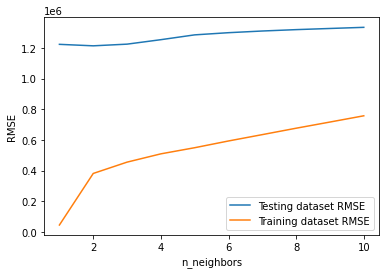

In [10]:
plt.plot(neighbors, test_rmse, label = 'Testing dataset RMSE')
plt.plot(neighbors, train_rmse, label = 'Training dataset RMSE')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('RMSE')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

-6134.978442911233


In [13]:
##y_pred = regr.predict(X_test)
##plt.scatter(X_test, y_test, color ='b')
##plt.plot(X_test, y_pred, color ='k')
  
##plt.show()

In [14]:
train_error = sqrt(mean_squared_error(y_train, regr.predict(X_train)))
print(train_error)

2441056.6095289346


In [15]:
test_error = sqrt(mean_squared_error(y_test, regr.predict(X_test)))
print(test_error)

198507867.62383276


In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [18]:
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.693069078694897


In [19]:
train_error = sqrt(mean_squared_error(y_train, rf.predict(X_train)))
print(train_error)

246352.58855565646


In [20]:
test_error = sqrt(mean_squared_error(y_test, rf.predict(X_test)))
print(test_error)

1403964.5211368392
